<a href="https://colab.research.google.com/github/dansarmiento/analytics_projects/blob/main/Triathlete_training_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries for data analysis and graphing
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo

In [ ]:
#https://docs.google.com/spreadsheets/d/1niHxkfCnuW83Q3ukyvqxmf4vk6O0bvl3zhOS6hwHlYA/edit?usp=sharing
#https://docs.google.com/spreadsheets/d/180hlbBRpd45AqzZSA_Y4os8mMiPdaO6T9VzBiezNtTw/edit
#sheet = Workout
df_sheet_id = '1niHxkfCnuW83Q3ukyvqxmf4vk6O0bvl3zhOS6hwHlYA'
df_sheet_name = 'Workout'
df_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(df_sheet_id,df_sheet_name)
df = pd.read_csv(df_url, parse_dates = ['WorkoutDTM'], usecols = ['WorkoutDTM','WorkoutNum', 'WorkoutType','Z1mins','Z2mins','Z3mins','Z4mins','Z5mins','TotalZoneMins'\
                                                                  ,'EffortDescription','WorkoutMetricType','Speed','Distance'])
#df.set_index('WorkoutDTM', inplace=True)
df['month_year'] = df.WorkoutDTM.dt.to_period('M')
df['quarter'] = df.WorkoutDTM.dt.to_period('Q')
df['year'] = df.WorkoutDTM.dt.to_period('Y')
df.to_csv('triathlon_training_year.csv', index=False)
df.head(5)

,WorkoutDTM,WorkoutNum,WorkoutType,Z1mins,Z2mins,Z3mins,Z4mins,Z5mins,TotalZoneMins,EffortDescription,WorkoutMetricType,Speed,Distance,month_year,quarter,year
0,2022-05-04 17:32:00,1,Run,1.83,30.72,1.70,0.00,0.00,34.25,Medium Rare,Miles_MPH,5.80,3.35,2022-05,2022Q2,2022
1,2022-05-04 19:52:00,2,Swim,3.17,12.72,0.00,0.00,0.00,15.88,Rare,Yards_mins_per_100,2.75,575.00,2022-05,2022Q2,2022
2,2022-05-07 07:13:00,3,Run,1.70,13.45,14.30,38.40,8.48,76.33,Medium Well,Miles_MPH,6.70,9.05,2022-05,2022Q2,2022
3,2022-05-07 20:34:00,4,Swim,15.15,1.40,0.00,0.00,0.00,16.55,Rare,Yards_mins_per_100,2.75,625.00,2022-05,2022Q2,2022
4,2022-05-10 06:37:00,5,Run,2.08,35.07,22.35,1.57,1.63,62.70,Medium Rare,Miles_MPH,6.10,6.27,2022-05,2022Q2,2022


In [ ]:
df.loc[df['WorkoutType'] == 'Swim', 'Distance'] = df['Distance'] / 1760
df['TotalZoneHours'] = df['TotalZoneMins'] / 60
df.head()

,WorkoutDTM,WorkoutNum,WorkoutType,Z1mins,Z2mins,Z3mins,Z4mins,Z5mins,TotalZoneMins,EffortDescription,WorkoutMetricType,Speed,Distance,month_year,quarter,year,TotalZoneHours
0,2022-05-04 17:32:00,1,Run,1.83,30.72,1.70,0.00,0.00,34.25,Medium Rare,Miles_MPH,5.80,3.350000,2022-05,2022Q2,2022,0.570833
1,2022-05-04 19:52:00,2,Swim,3.17,12.72,0.00,0.00,0.00,15.88,Rare,Yards_mins_per_100,2.75,0.000186,2022-05,2022Q2,2022,0.264667
2,2022-05-07 07:13:00,3,Run,1.70,13.45,14.30,38.40,8.48,76.33,Medium Well,Miles_MPH,6.70,9.050000,2022-05,2022Q2,2022,1.272167
3,2022-05-07 20:34:00,4,Swim,15.15,1.40,0.00,0.00,0.00,16.55,Rare,Yards_mins_per_100,2.75,0.000202,2022-05,2022Q2,2022,0.275833
4,2022-05-10 06:37:00,5,Run,2.08,35.07,22.35,1.57,1.63,62.70,Medium Rare,Miles_MPH,6.10,6.270000,2022-05,2022Q2,2022,1.045000


In [ ]:
# Pivot table
month_df = df.pivot_table(index='month_year', columns='WorkoutType', values='Distance', aggfunc='sum', fill_value=0)

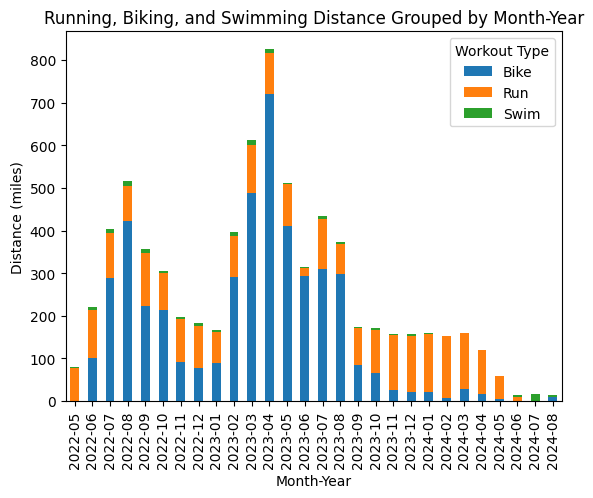

In [ ]:
# Plotting
month_df.plot(kind='bar', stacked=True)
plt.xlabel('Month-Year')
plt.ylabel('Distance (miles)')
plt.title('Running, Biking, and Swimming Distance Grouped by Month-Year')
plt.legend(title='Workout Type')
plt.show()

In [ ]:
# Pivot table
quarter_df = df.pivot_table(index='quarter', columns='WorkoutType', values='Distance', aggfunc='sum', fill_value=0)

<Figure size 800x2000 with 0 Axes>

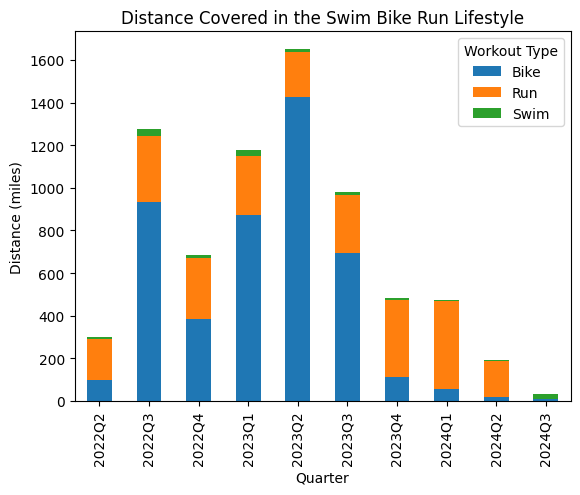

In [ ]:
# Plotting
plt.figure(figsize=(8, 20))
quarter_df.plot(kind='bar', stacked=True)
plt.xlabel('Quarter')
plt.ylabel('Distance (miles)')
plt.title('Distance Covered in the Swim Bike Run Lifestyle')
plt.legend(title='Workout Type')

plt.show()

In [ ]:
# Pivot table
quarter_time = df.pivot_table(index='quarter', columns='WorkoutType', values='TotalZoneHours', aggfunc='sum', fill_value=0)

<Figure size 800x2000 with 0 Axes>

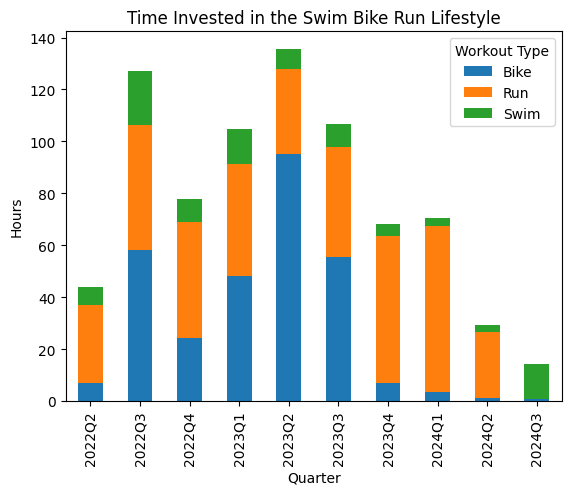

In [ ]:
# Plotting
plt.figure(figsize=(8, 20))
quarter_time.plot(kind='bar', stacked=True)
plt.xlabel('Quarter')
plt.ylabel('Hours')
plt.title('Time Invested in the Swim Bike Run Lifestyle')
plt.legend(title='Workout Type')

plt.show()

In [ ]:
swim_distance = df[df.WorkoutType == 'Swim'][['Distance', 'month_year']]
bike_distance = df[df.WorkoutType == 'Bike'][['Distance', 'month_year']]
run_distance = df[df.WorkoutType == 'Run'][['Distance', 'month_year']]
run_distance = run_distance.groupby('month_year').sum()
bike_distance = bike_distance.groupby('month_year').sum()
swim_distance = swim_distance.groupby('month_year').sum()
swim_distance.head()

,Distance
month_year,
2022-05,3800.0
2022-06,13000.0
2022-07,15500.0
2022-08,24100.0
2022-09,15800.0


In [ ]:
bike_distance['cumsum'] = bike_distance.cumsum()
run_distance['cumsum'] = run_distance.cumsum()
swim_distance['cumsum'] = swim_distance.cumsum()

<ipython-input-5-ceee681753aa>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0, 0.5, 'miles')

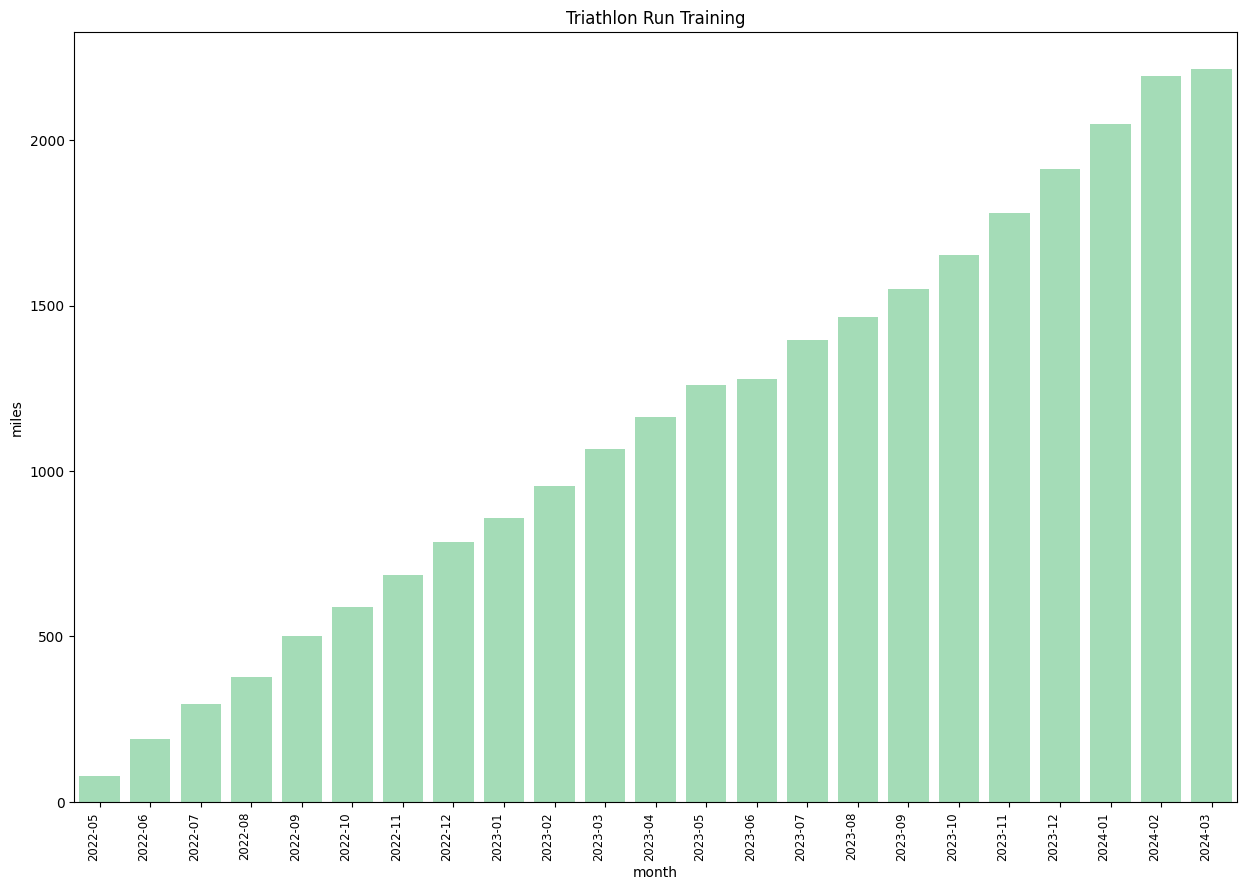

In [ ]:
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
# plt.figure(figsize=(10,5))
plt.figure(figsize=(15,10))
chart = sns.barplot(data=run_distance,
    x=run_distance.index, y='cumsum', color='#9BE5B4', ci=None).set(title='Triathlon Run Training')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)
plt.xlabel("month")
plt.ylabel("miles")
#plt.savefig('quarterly_running_speed_history.png')

Text(0, 0.5, 'miles')

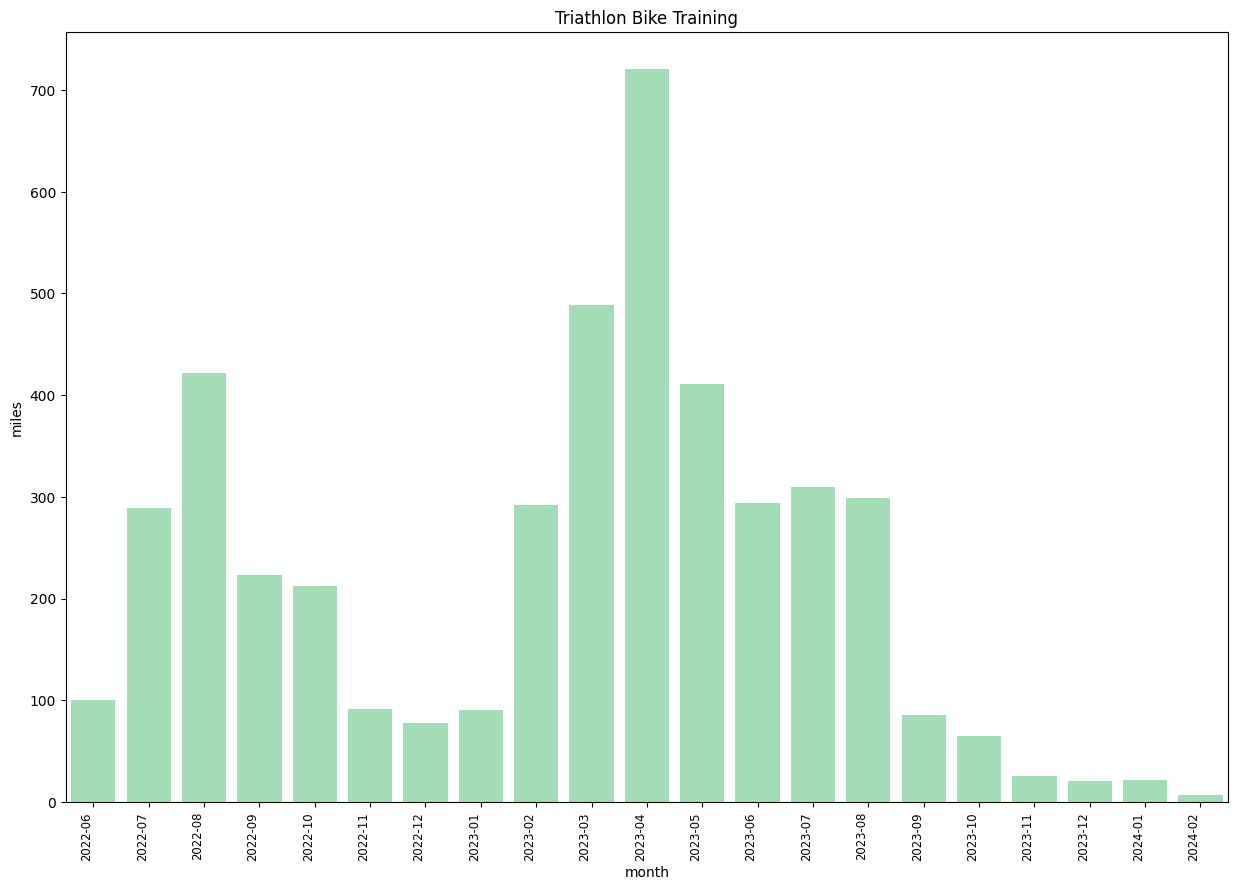

In [ ]:
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
# plt.figure(figsize=(10,5))
plt.figure(figsize=(15,10))
chart = sns.barplot(data=bike_distance,
    x=bike_distance.index, y='Distance', color='#9BE5B4', errorbar=None).set(title='Triathlon Bike Training')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)
plt.xlabel("month")
plt.ylabel("miles")


#plt.savefig('quarterly_running_speed_history.png')

In [ ]:
df.set_index("WorkoutDTM", inplace=True)

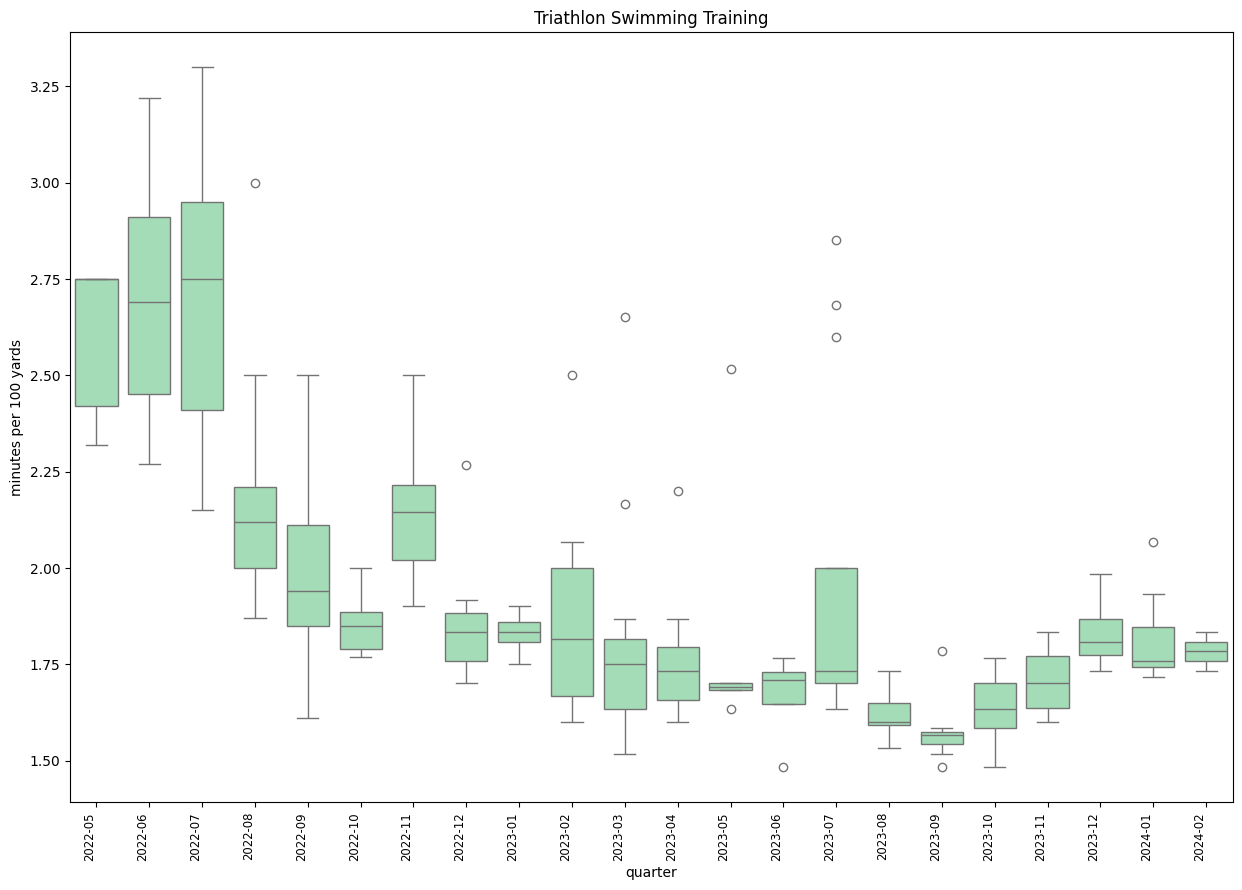

In [ ]:
plt.figure(figsize=(15,10))
chart = sns.boxplot(data=df[df.WorkoutType == 'Swim'],
    x='month_year', y='Speed', color='#9BE5B4', ).set(title='Triathlon Swimming Training')
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
      )
plt.xlabel("quarter")
plt.ylabel("minutes per 100 yards")
plt.savefig('quarterly_running_speed_history.png')

<ipython-input-10-b3a1e9cb7493>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0, 0.5, 'yards')

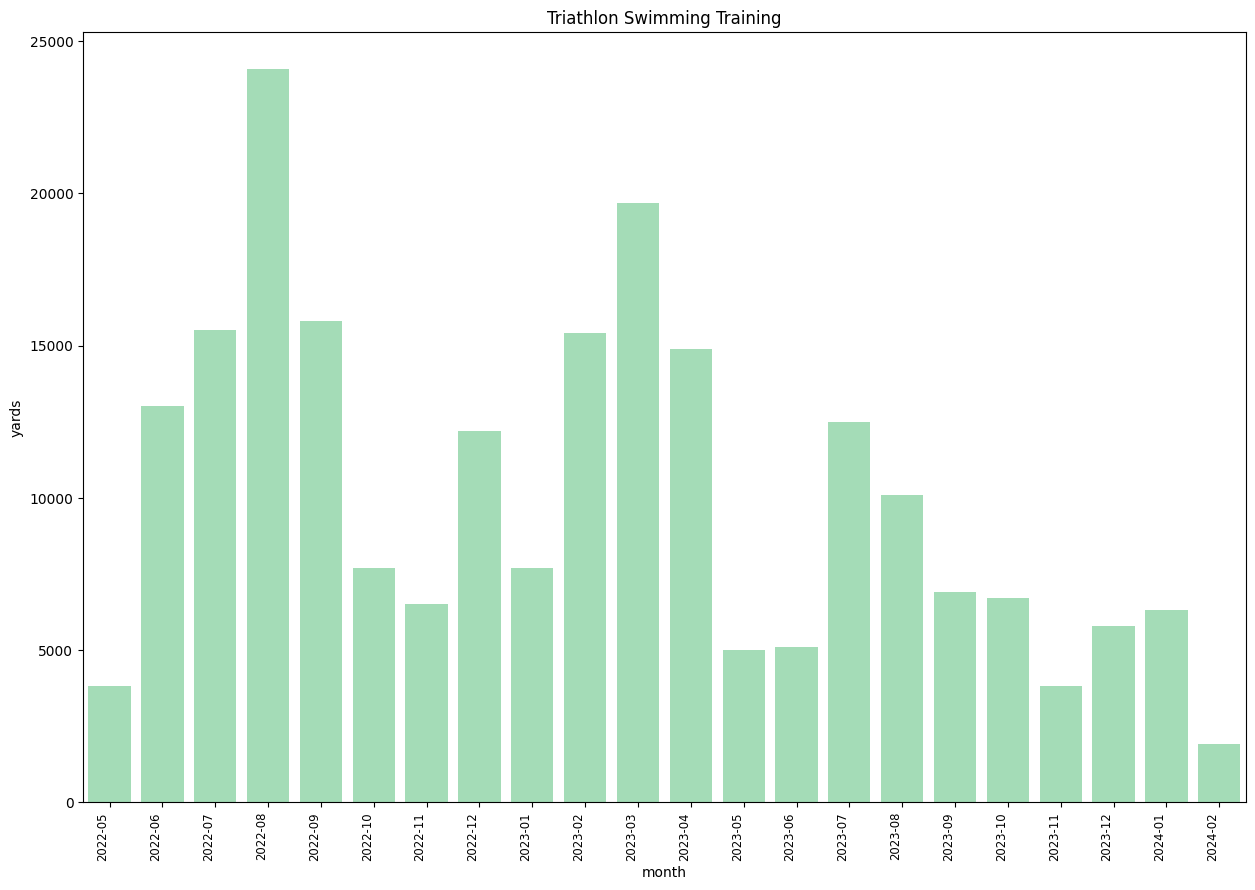

In [ ]:
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
# plt.figure(figsize=(10,5))
plt.figure(figsize=(15,10))
chart = sns.barplot(data=swim_distance,
    x=swim_distance.index, y='Distance', color='#9BE5B4', ci=None).set(title='Triathlon Swimming Training')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)
plt.xlabel("month")
plt.ylabel("yards")
#plt.savefig('quarterly_running_speed_history.png')

In [ ]:
sns.jointplot(x=swim['Distance'], y=swim['Speed'])

NameError: name 'swim' is not defined

Text(0, 0.5, 'miles per hour')

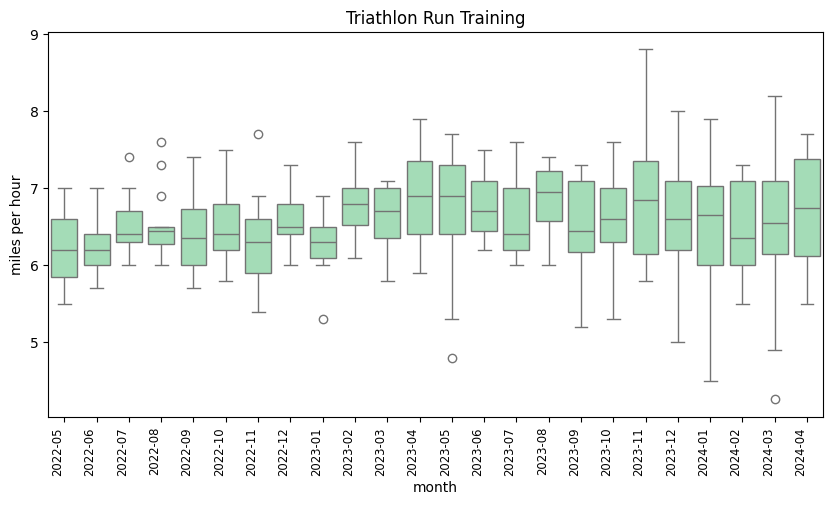

In [ ]:


plt.figure(figsize=(10,5))
chart = sns.boxplot(data=df[df.WorkoutType == 'Run'], x='month_year', y='Speed',
                    color='#9BE5B4', ).set(title='Triathlon Run Training')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)
plt.xlabel("month")
plt.ylabel("miles per hour")

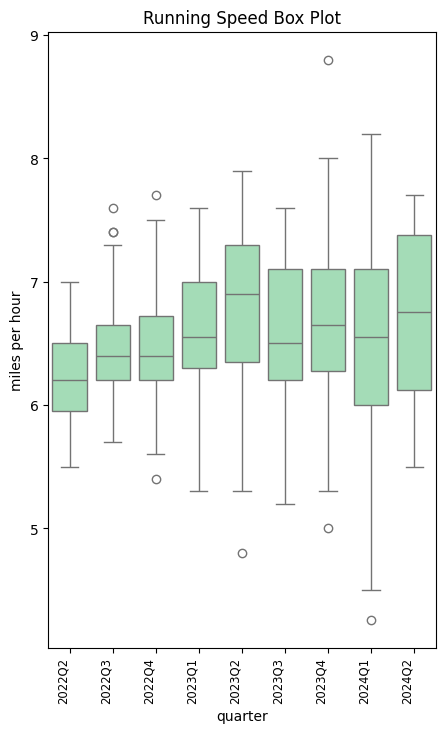

In [ ]:
plt.figure(figsize=(5,8))
chart = sns.boxplot(data=df[df.WorkoutType == 'Run'], x='quarter', y='Speed',
                    color='#9BE5B4', ).set(title='Running Speed Box Plot')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)
plt.xlabel("quarter")
plt.ylabel("miles per hour")
plt.savefig('run_progress.png')

<Figure size 500x800 with 0 Axes>

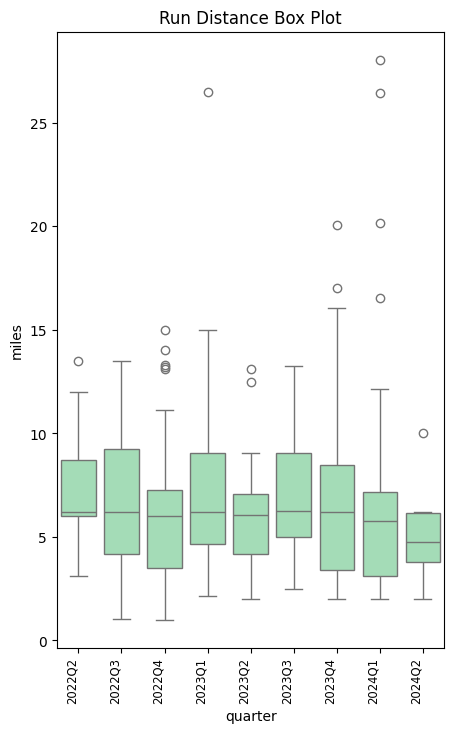

In [ ]:
plt.figure(figsize=(5,8))
plt.figure(figsize=(5,8))
chart = sns.boxplot(data=df[df.WorkoutType == 'Run'], x='quarter', y='Distance',
                    color='#9BE5B4', ).set(title='Run Distance Box Plot')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)
plt.xlabel("quarter")
plt.ylabel("miles")
plt.savefig('run_distance.png')

In [ ]:
df.WorkoutType.unique()

In [ ]:
swim_distance.groupby(by='month_year').Distance.sum().cumsum()

In [ ]:
bike_distance.groupby(by='month_year').Distance.sum().cumsum()

In [ ]:
df.groupby(by=['WorkoutType', 'month_year']).Distance.sum().cumsum()

In [ ]:
sns.distplot(a=run['Speed'], hist=True, kde=True, rug=False)

In [ ]:
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
# plt.figure(figsize=(10,5))
plt.figure(figsize=(15,10))
chart = sns.boxplot(data=df[df.WorkoutType == 'Bike'],
    x='month_year', y='Speed', color='#9BE5B4', ).set(title='Triathlon Bike Training')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)
plt.xlabel("quarter")
plt.ylabel("average watts")
#plt.savefig('quarterly_running_speed_history.png')

In [ ]:
plt.figure(figsize=(15,10))
chart = sns.boxplot(data=df[df.WorkoutType == 'Bike'],
    x='month_year', y='Distance', color='#9BE5B4', ).set(title='Triathlon Bike Training')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
)
plt.xlabel("quarter")
plt.ylabel("average watts")